# How to use 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simaki/fracdiff/blob/master/sample/howto/howto.ipynb)

In [1]:
# !pip install matplotlib pandas pandas_datareader seaborn
# !pip install fracdiff

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader
import seaborn
from pandas.plotting import register_matplotlib_converters

seaborn.set_style("white")

In [3]:
def fetch_yahoo(ticker):
    """
    Returns: pd.Series
    """
    return pandas_datareader.data.DataReader(
        ticker, "yahoo", "2000-01-01", "2020-09-30"
    )["Adj Close"]

## Fractional differentiation

In [4]:
import numpy as np
from fracdiff import fdiff

In [5]:
a = np.array([1, 2, 4, 7, 0])

In [6]:
fdiff(a, n=0.5)

array([ 1.       ,  1.5      ,  2.875    ,  4.6875   , -4.1640625])

In [7]:
np.array_equal(fdiff(a, n=1), np.diff(a, n=1))

True

In [8]:
a = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])

In [9]:
fdiff(a, n=0.5, axis=0)

array([[ 1. ,  3. ,  6. , 10. ],
       [-0.5,  3.5,  3. ,  3. ]])

In [10]:
fdiff(a, n=0.5, axis=-1)

array([[1.    , 2.5   , 4.375 , 6.5625],
       [0.    , 5.    , 3.5   , 4.375 ]])

## Preprocessing by fractional differentiation

In [11]:
from fracdiff import Fracdiff

spx = fetch_yahoo("^GSPC")  # S&P 500

In [12]:
X = spx.values.reshape(-1, 1)
f = Fracdiff(0.5, mode="valid", window=100)
X = f.fit_transform(X)

In [13]:
diff = pd.DataFrame(X, index=spx.index[-X.size :], columns=["SPX 0.5th fracdiff"])

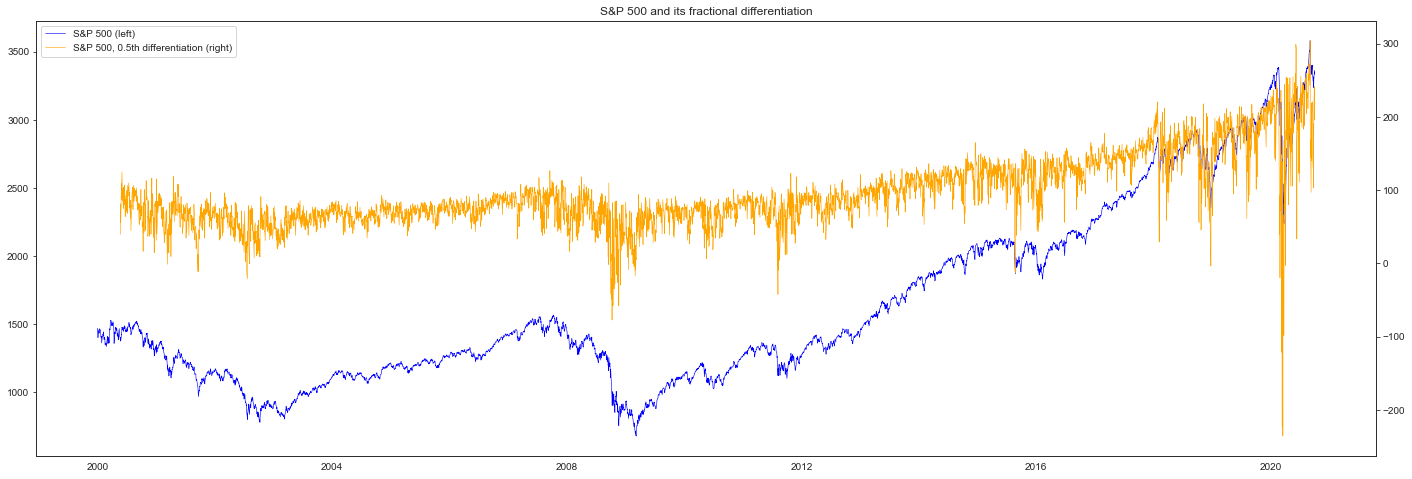

In [14]:
fig, ax_s = plt.subplots(figsize=(24, 8))
ax_d = ax_s.twinx()

plot_s = ax_s.plot(spx, color="blue", linewidth=0.6, label="S&P 500 (left)")
plot_d = ax_d.plot(
    diff,
    color="orange",
    linewidth=0.6,
    label="S&P 500, 0.5th differentiation (right)",
)
plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.title("S&P 500 and its fractional differentiation")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)
X, y = np.random.randn(100, 4), np.random.randn(100)

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("fracdiff", Fracdiff(0.5)),
        ("regressor", LinearRegression()),
    ]
)
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('fracdiff',
                 Fracdiff(d=0.5, window=10, mode=full, window_policy=fixed)),
                ('regressor', LinearRegression())])

## Differentiation while preserving memory

In [16]:
from fracdiff import FracdiffStat

In [17]:
np.random.seed(42)
X = np.random.randn(100, 3).cumsum(0)
f = FracdiffStat().fit(X)
f.d_

array([0.71875 , 0.609375, 0.515625])

In [18]:
nky = fetch_yahoo("^N225")  # Nikkei 225

fs = FracdiffStat(window=100, mode="valid")
diff = fs.fit_transform(nky.values.reshape(-1, 1))

In [19]:
diff = pd.DataFrame(
    diff.reshape(-1), index=nky.index[-diff.size :], columns=["Nikkei 225 fracdiff"]
)

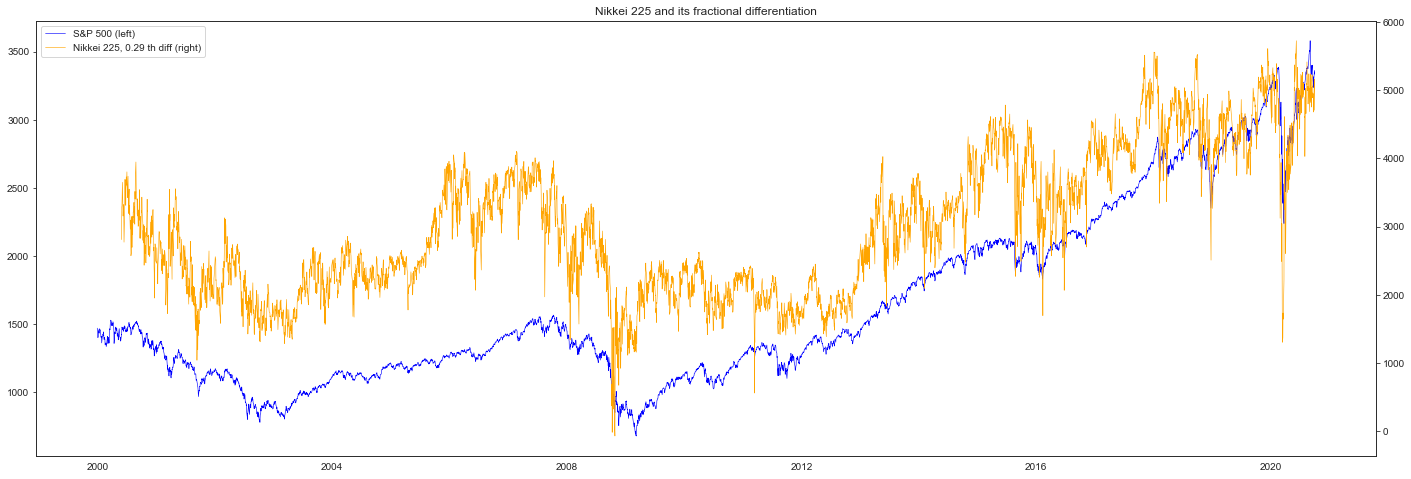

In [20]:
fig, ax_s = plt.subplots(figsize=(24, 8))
ax_d = ax_s.twinx()

plot_s = ax_s.plot(spx, color="blue", linewidth=0.6, label="S&P 500 (left)")
plot_d = ax_d.plot(
    diff,
    color="orange",
    linewidth=0.6,
    label=f"Nikkei 225, {fs.d_[0]:.2f} th diff (right)",
)
plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.title("Nikkei 225 and its fractional differentiation")
plt.show()